<b>Name:</b> Vedullapalli Shanmukh Sri Sai <br>
<b>Reg.no:</b> 12007036 <br>
<b>Section:</b> K20MP 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('winequality-red.csv',sep=';')

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [50]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
data.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [6]:
values_count = data.quality.value_counts()
values_count

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

## Univariate Analysis

In [28]:
values_count = data.quality.value_counts()
values_count

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

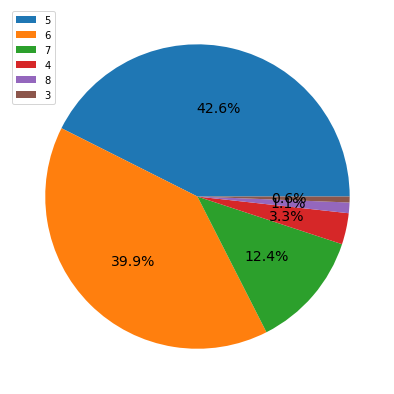

In [30]:
plt.figure(figsize=(7,7))
plt.pie(values_count,autopct='%1.1f%%',textprops={'fontsize':14})
plt.legend([5,6,7,4,8,3])
plt.show()

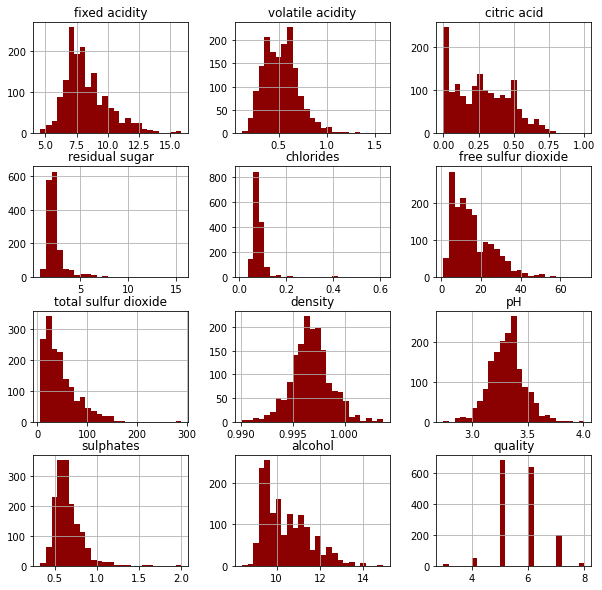

In [34]:
data.hist(bins=25,figsize=(10,10),color='darkred')
plt.show()

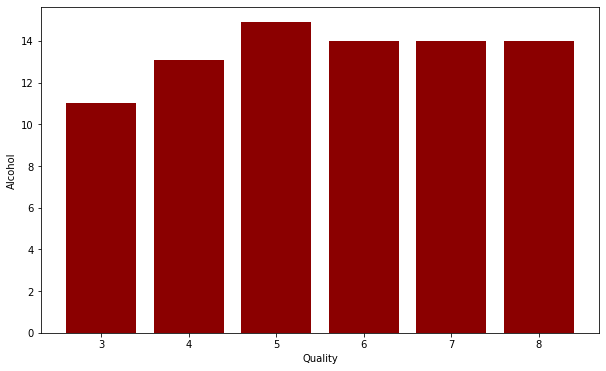

In [48]:
plt.figure(figsize=(10,6))
plt.bar(data['quality'],data['alcohol'],color='darkred')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

<AxesSubplot:xlabel='quality', ylabel='Count'>

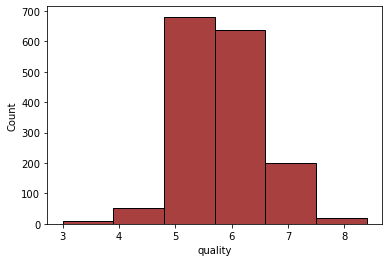

In [35]:
sns.histplot(data.quality,color='darkred',binwidth=0.9)

##### we see that wine quality is approximately normally distributed.

<AxesSubplot:xlabel='pH', ylabel='Count'>

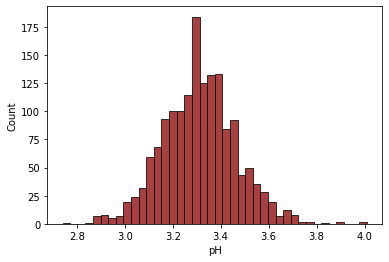

In [36]:
sns.histplot(data.pH,color='darkred')

##### The pH is normally distributed with few outliers

<AxesSubplot:xlabel='fixed acidity', ylabel='Count'>

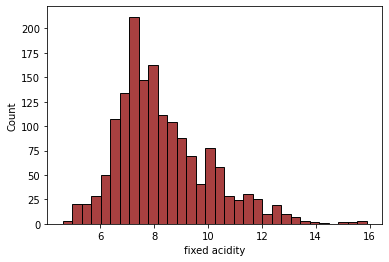

In [37]:
sns.histplot(data['fixed acidity'],color='darkred')

##### Fixed acidity have some outliers and peaks between 6 and 7 g/dm<sup>3</sup>

<AxesSubplot:xlabel='volatile acidity', ylabel='Count'>

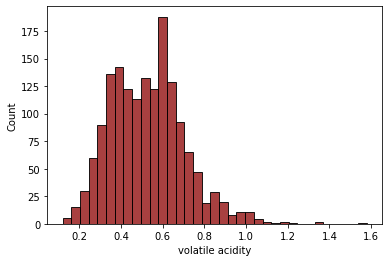

In [38]:
sns.histplot(data['volatile acidity'],color='darkred')

##### Volatile acidity has quite a few outliers with high values

<AxesSubplot:xlabel='citric acid', ylabel='Count'>

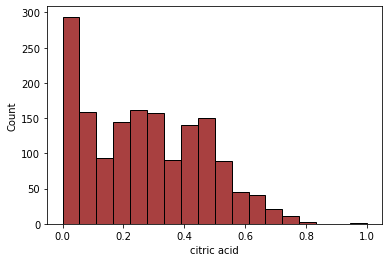

In [39]:
sns.histplot(data['citric acid'],color='darkred')

##### It looks like most of the wines have 0 g/L of citric acid. There is also a spike at 0.02.

<AxesSubplot:xlabel='density', ylabel='Count'>

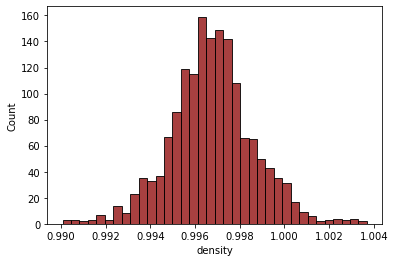

In [40]:
sns.histplot(data['density'],color='darkred')

##### Density has an almost normal distribution with few outliers.

<AxesSubplot:xlabel='residual sugar', ylabel='Count'>

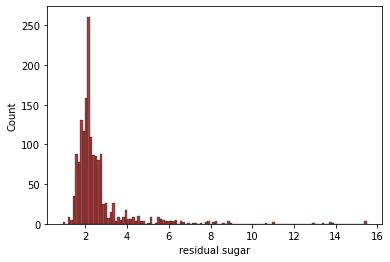

In [41]:
sns.histplot(data['residual sugar'],color='darkred')

##### There are many outliers with high residual sugar and the distribution is skewed right.

<AxesSubplot:xlabel='chlorides', ylabel='Count'>

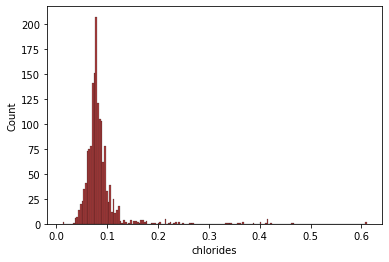

In [42]:
sns.histplot(data['chlorides'],color='darkred')

##### Chloride distribution is skewed right and with outliers

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Count'>

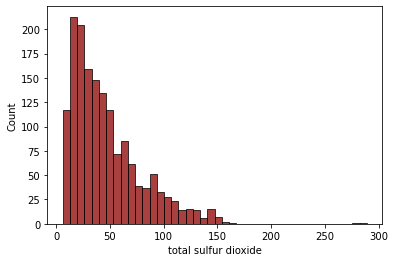

In [43]:
sns.histplot(data['total sulfur dioxide'],color='darkred')

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Count'>

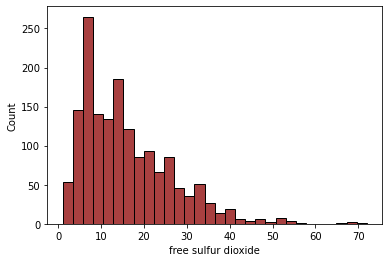

In [44]:
sns.histplot(data['free sulfur dioxide'],color='darkred')

##### Distribution for free sulfur dioxide and total sulfur dioxide is skewed right.

<AxesSubplot:xlabel='sulphates', ylabel='Count'>

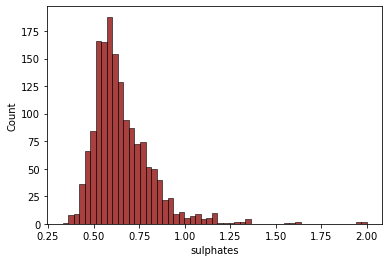

In [45]:
sns.histplot(data['sulphates'],color='darkred')

##### Distribution for sulphates is skewed right with some outliers

<AxesSubplot:xlabel='alcohol', ylabel='Count'>

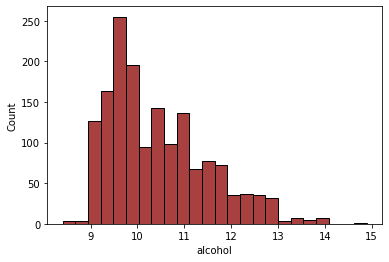

In [46]:
sns.histplot(data['alcohol'],color='darkred')

##### The alcohol distribution is right skewed. It will be interseting to see whether different quality wines have distinct alcohol content.

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

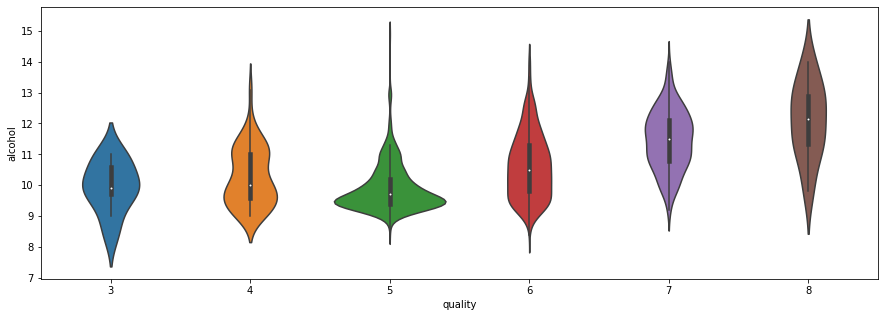

In [60]:
plt.figure(figsize=(15,5))
sns.violinplot(data=data,x='quality',y='alcohol')

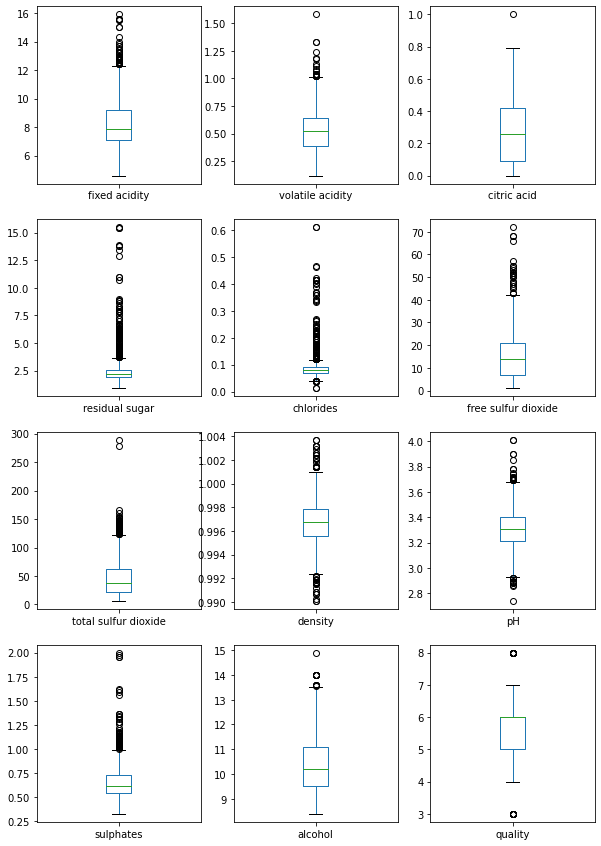

In [63]:
plt.figure(figsize=(10,15))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(4,3,i+1)
    data.boxplot(col)
    plt.grid()
    plt.tight_layout

## Bivariate Analysis

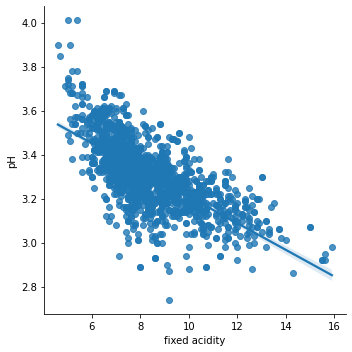

In [61]:
sns.lmplot(x='fixed acidity',y='pH',data=data)

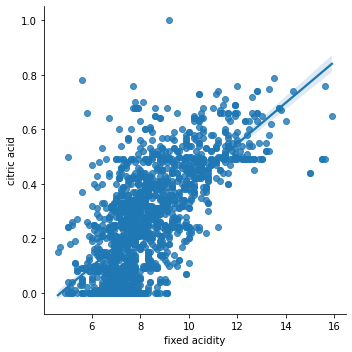

In [62]:
sns.lmplot(x='fixed acidity',y='citric acid',data=data)

<AxesSubplot:>

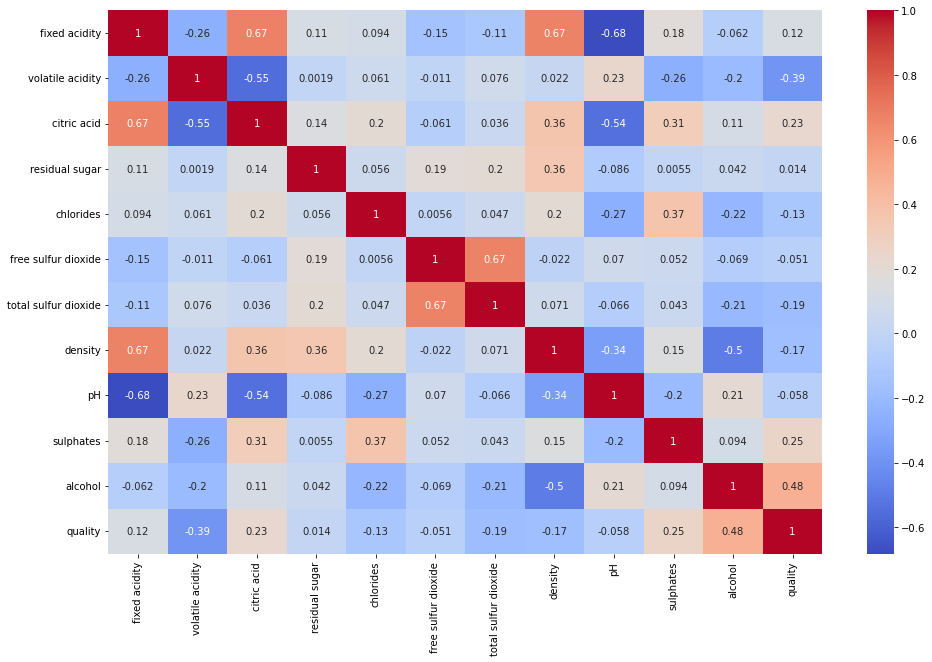

In [64]:
correlation = data.corr()
plt.figure(figsize=(16,10))
sns.heatmap(correlation,annot=True,cmap='coolwarm')

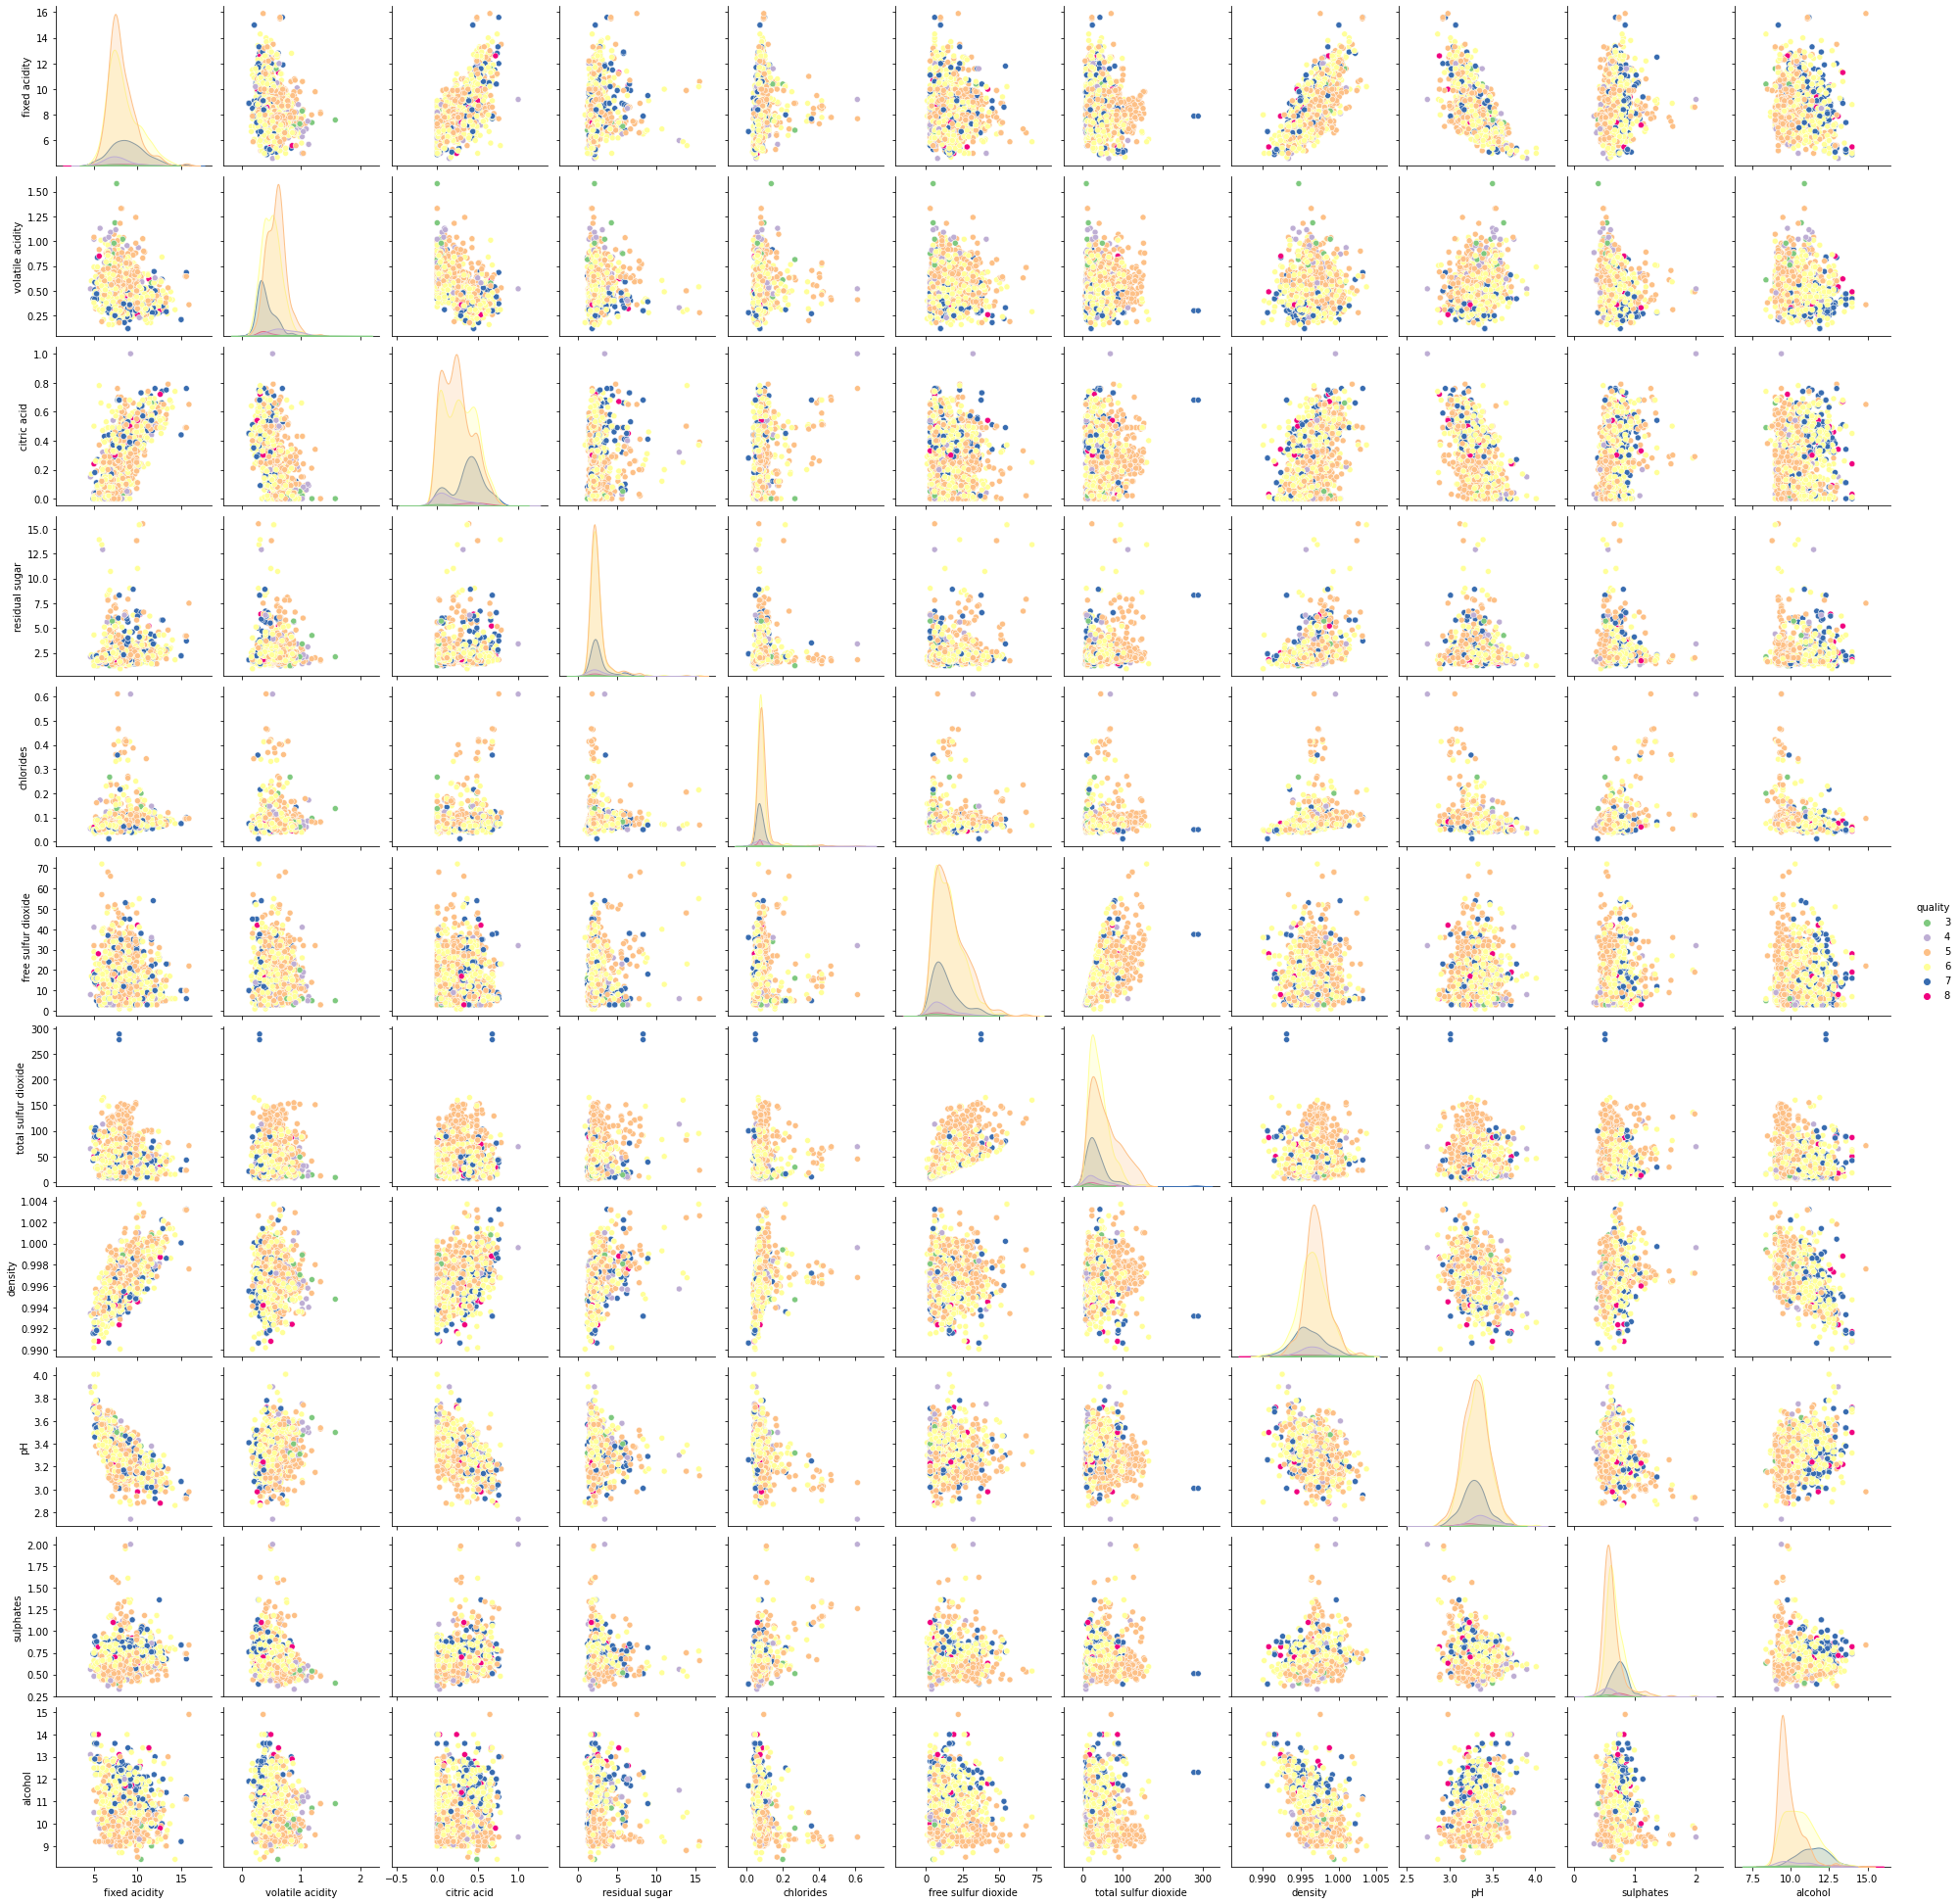

In [65]:
sns.pairplot(data,hue='quality',palette='Accent')